In [1]:
import tensorflow
import pickle
import numpy as np

In [2]:
with open("C:\\Users\\samru\\Downloads\\train_qa-220120-145526.txt","rb") as fp:
    train_data = pickle.load(fp)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [4]:
with open("C:\\Users\\samru\\Downloads\\test_qa-220120-145430.txt","rb") as fp:
    test_data = pickle.load(fp)

In [5]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
type(test_data)

list

In [7]:
type(train_data)

list

In [8]:
len(test_data)

1000

In [9]:
len(train_data)

10000

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
vocab = set()

In [12]:
all_data = test_data + train_data

In [13]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [14]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('yes')
vocab.add('no')

In [16]:
len(vocab)

37

In [17]:
vocab_len = len(vocab)+1

In [18]:
for data in all_data:
    print(data)
    print("\n")

(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no')


(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no')


(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.'], ['Is', 'John', 'in', 'the', 'garden', '?'], 'yes')


(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'travelled', 'to'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [20]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [21]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [22]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [23]:
tokenizer = Tokenizer(filters=[])

In [24]:
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index

{'daniel': 1,
 'left': 2,
 'took': 3,
 'no': 4,
 'travelled': 5,
 'journeyed': 6,
 'there': 7,
 'bathroom': 8,
 'got': 9,
 'back': 10,
 'up': 11,
 '?': 12,
 'grabbed': 13,
 'went': 14,
 'to': 15,
 'in': 16,
 'garden': 17,
 'sandra': 18,
 'football': 19,
 'hallway': 20,
 '.': 21,
 'discarded': 22,
 'put': 23,
 'is': 24,
 'kitchen': 25,
 'the': 26,
 'bedroom': 27,
 'moved': 28,
 'yes': 29,
 'picked': 30,
 'john': 31,
 'down': 32,
 'milk': 33,
 'mary': 34,
 'office': 35,
 'dropped': 36,
 'apple': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [27]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [28]:
len(train_story_text)

10000

In [29]:
len(train_story_seq)

10000

In [35]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_ques_len=max_ques_len):
    
    X = []
    Xq= []
    Y = []
    
    for story,question,answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in question]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
            
    return (pad_sequences(X, maxlen = max_story_len),pad_sequences(Xq, maxlen = max_ques_len),np.array(Y))
        

In [36]:
inputs_train,questions_train,answers_train = vectorize_stories(train_data)

In [37]:
inputs_test,questions_test,answers_test = vectorize_stories(test_data)

In [38]:
inputs_train

array([[ 0,  0,  0, ..., 26, 27, 21],
       [ 0,  0,  0, ..., 26, 20, 21],
       [ 0,  0,  0, ..., 26,  8, 21],
       ...,
       [ 0,  0,  0, ..., 26, 27, 21],
       [ 0,  0,  0, ..., 33,  7, 21],
       [ 0,  0,  0, ..., 37,  7, 21]])

In [40]:
tokenizer.word_index['yes']

29

In [41]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout,add, dot, concatenate, LSTM

In [43]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [44]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [46]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [47]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length= max_ques_len))
question_encoder.add(Dropout(0.3))

In [48]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [50]:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [51]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [52]:
answer = concatenate([response,question_encoded])

In [53]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [54]:
answer= LSTM(32)(answer)

In [55]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [56]:
answer = Activation('softmax')(answer)

In [57]:
model = Model([input_sequence, question], answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [59]:
history = model.fit([inputs_train, questions_train], answers_train, batch_size = 32, epochs = 20, validation_data = ([inputs_test, questions_test], answers_test))

Epoch 1/20
313/313 [==============================] - 11s 25ms/step - loss: 0.9002 - accuracy: 0.5043 - val_loss: 0.7087 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 7s 22ms/step - loss: 0.7025 - accuracy: 0.5008 - val_loss: 0.6953 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6964 - accuracy: 0.4959 - val_loss: 0.6972 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 9s 28ms/step - loss: 0.6954 - accuracy: 0.4921 - val_loss: 0.6970 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 8s 26ms/step - loss: 0.6944 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4930
Epoch 6/20
313/313 [==============================] - 7s 22ms/step - loss: 0.6949 - accuracy: 0.4967 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6946 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.497

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

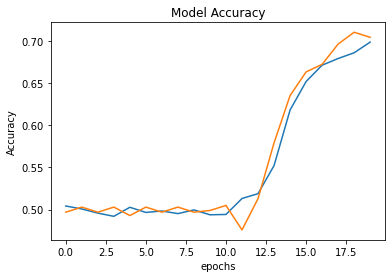

In [62]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")


In [63]:
model.save("chat_bot")

INFO:tensorflow:Assets written to: chat_bot\assets


INFO:tensorflow:Assets written to: chat_bot\assets


In [64]:
model.load_weights("chat_bot")

In [66]:
pred_results = model.predict(([inputs_test, questions_test]))

In [67]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [68]:
story = ' '.join(word for word in test_data[0][0])

In [69]:
story

'Mary got the milk there . John moved to the bedroom .'

In [70]:
query = ' '.join(word for word in test_data[0][1])

In [71]:
query

'Is John in the kitchen ?'

In [75]:
val_max = np.argmax(pred_results[13])
    
for key,val in tokenizer.word_index.items():
    if val == val_max:
     k = key
        
print("Predicted answer is ", k)
print("Probability of certainty", pred_results[0][val_max])

Predicted answer is  no
Probability of certainty 0.27779788


In [76]:
story = "Mary dropped the football . Sandra discarded apple in kitchen"
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [77]:
my_ques = "Is apple in the kitchen ? "
my_ques.split()

['Is', 'apple', 'in', 'the', 'kitchen', '?']

In [78]:
mydata = [(story.split(), my_ques.split(), 'yes')]

In [79]:
mystory, myques, myans = vectorize_stories(mydata)

In [80]:
pred_results = model.predict(([mystory,myques]))

In [81]:
val_max = np.argmax(pred_results[0])
    
for key,val in tokenizer.word_index.items():
    if val == val_max:
     k = key
        
print("Predicted answer is ", k)
print("Probability of certainty", pred_results[0][val_max])

Predicted answer is  yes
Probability of certainty 0.5425793
